In [1]:
import sys
from pathlib import Path


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report


from spnc import spnc_anisotropy
import spnc_ml as ml

In [2]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

noise-free, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
Attributes and values of the instance associated with res:

interdensity: 100
restart: True
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.49999977789842975
p2: 0.5000002221015702
f_theta_1: <scipy.interpolate.interpolate.interp1d object at 0x00000234517188B8>
f_theta_2: <scipy.interpolate.interpolate.interp1d object at 0x0000023451718958>
f_e_12_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023451749D68>
f_e_21_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023451749EF8>
f_e_12_big: <scipy.interpolate.interpolate.interp1d object at 0x00000234516D20E8>
f_e_21_big: <scipy.interpolate.interpolate.interp1

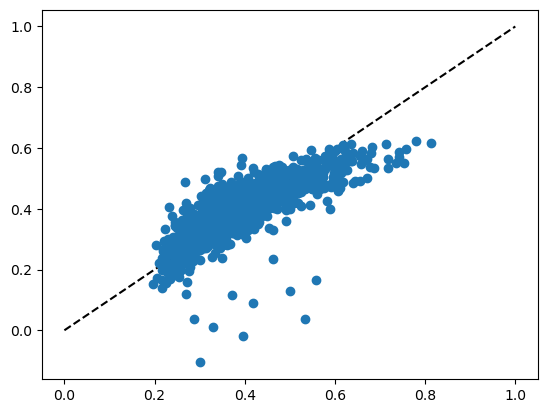

In [3]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in train, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
Attributes and values of the instance associated with res:

interdensity: 100
restart: True
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.49999977789842975
p2: 0.5000002221015702
f_theta_1: <scipy.interpolate.interpolate.interp1d object at 0x00000234516D2A48>
f_theta_2: <scipy.interpolate.interpolate.interp1d object at 0x0000023451749D18>
f_e_12_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023451718908>
f_e_21_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023451E95318>
f_e_12_big: <scipy.interpolate.interpolate.interp1d object at 0x0000023451ECD868>
f_e_21_big: <scipy.interpolate.interpolate.interp1

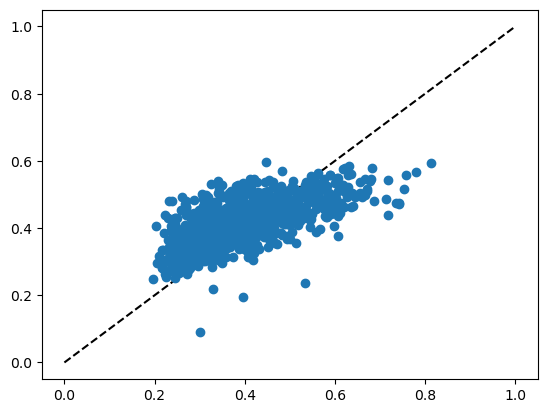

In [4]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'train',
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in test, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
Attributes and values of the instance associated with res:

interdensity: 100
restart: True
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.49999977789842975
p2: 0.5000002221015702
f_theta_1: <scipy.interpolate.interpolate.interp1d object at 0x0000023451629D18>
f_theta_2: <scipy.interpolate.interpolate.interp1d object at 0x0000023451F289F8>
f_e_12_small: <scipy.interpolate.interpolate.interp1d object at 0x00000234516D2D68>
f_e_21_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023451F22228>
f_e_12_big: <scipy.interpolate.interpolate.interp1d object at 0x0000023451F04D18>
f_e_21_big: <scipy.interpolate.interpolate.interp1

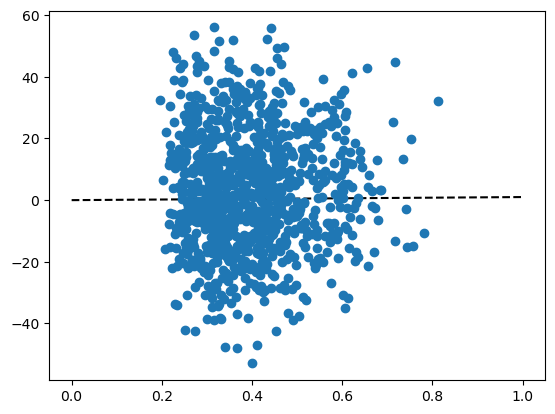

In [5]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'test',
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in both, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
Attributes and values of the instance associated with res:

interdensity: 100
restart: True
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.49999977789842975
p2: 0.5000002221015702
f_theta_1: <scipy.interpolate.interpolate.interp1d object at 0x00000234517421D8>
f_theta_2: <scipy.interpolate.interpolate.interp1d object at 0x0000023451FBF1D8>
f_e_12_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023451F98368>
f_e_21_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023451F91778>
f_e_12_big: <scipy.interpolate.interpolate.interp1d object at 0x0000023451F919A8>
f_e_21_big: <scipy.interpolate.interpolate.interp1

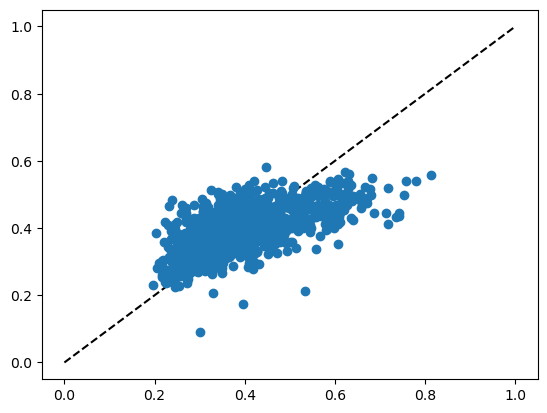

In [6]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

### test the slow version 

noise-free

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
Attributes and values of the instance associated with res:

interdensity: 100
restart: True
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.49999977789842975
p2: 0.5000002221015702
f_theta_1: <scipy.interpolate.interpolate.interp1d object at 0x0000023451F9A278>
f_theta_2: <scipy.interpolate.interpolate.interp1d object at 0x000002345200A778>
f_e_12_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023452005F98>
f_e_21_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023452005098>
f_e_12_big: <scipy.interpolate.interpolate.interp1d object at 0x0000023451F91A48>
f_e_21_big: <scipy.interpolate.interpolate.interp1

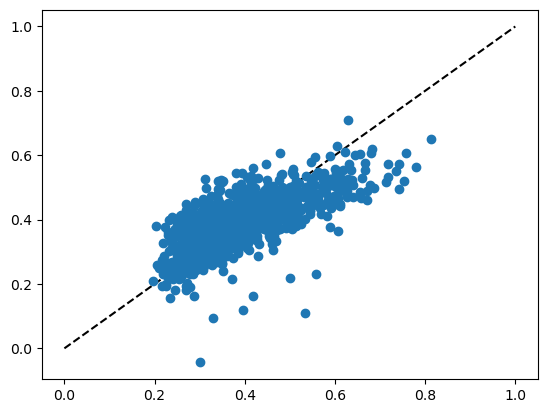

In [7]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in train

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
Attributes and values of the instance associated with res:

interdensity: 100
restart: True
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.49999977789842975
p2: 0.5000002221015702
f_theta_1: <scipy.interpolate.interpolate.interp1d object at 0x0000023452013AE8>
f_theta_2: <scipy.interpolate.interpolate.interp1d object at 0x0000023452039278>
f_e_12_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023453DDFA48>
f_e_21_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023453F50188>
f_e_12_big: <scipy.interpolate.interpolate.interp1d object at 0x0000023453F507C8>
f_e_21_big: <scipy.interpolate.interpolate.interp1

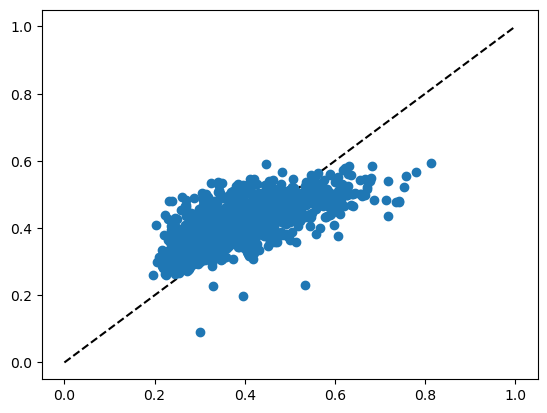

In [10]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'train',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in test

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
Attributes and values of the instance associated with res:

interdensity: 100
restart: True
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.49999977789842975
p2: 0.5000002221015702
f_theta_1: <scipy.interpolate.interpolate.interp1d object at 0x0000023453DE4B38>
f_theta_2: <scipy.interpolate.interpolate.interp1d object at 0x00000234530348B8>
f_e_12_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023453F8C228>
f_e_21_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023453F84188>
f_e_12_big: <scipy.interpolate.interpolate.interp1d object at 0x0000023453F80EF8>
f_e_21_big: <scipy.interpolate.interpolate.interp1

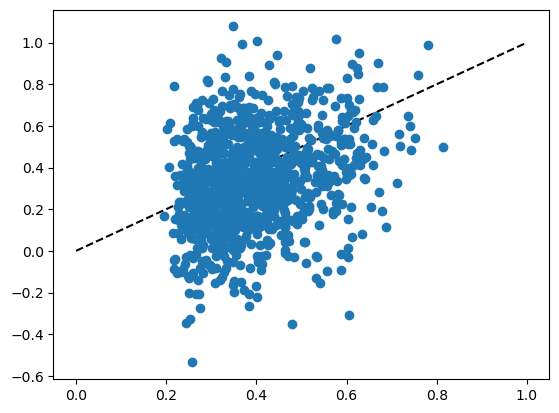

In [11]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'test',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in both

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
Attributes and values of the instance associated with res:

interdensity: 100
restart: True
Primep1: None
h: 0.4
theta_H: 90
k_s: 0
phi: 45
beta_prime: 20
e_12_small: 0.3599999363021649
e_21_small: 0.35999998072247896
e_12_big: 1.9599999165590078
e_21_big: 1.959999960979322
theta_1: 23.56435643564356
theta_2: 156.41764176417644
f0: 10000000000.0
p1: 0.49999977789842975
p2: 0.5000002221015702
f_theta_1: <scipy.interpolate.interpolate.interp1d object at 0x0000023453F8C138>
f_theta_2: <scipy.interpolate.interpolate.interp1d object at 0x0000023453E46B38>
f_e_12_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023453F8FAE8>
f_e_21_small: <scipy.interpolate.interpolate.interp1d object at 0x0000023453166AE8>
f_e_12_big: <scipy.interpolate.interpolate.interp1d object at 0x0000023453E02408>
f_e_21_big: <scipy.interpolate.interpolate.interp1

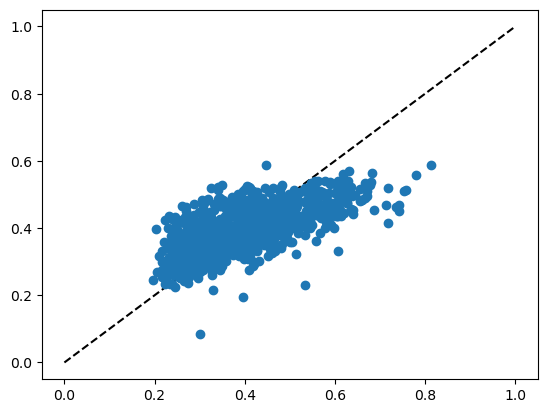

In [12]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)